## Sports Management Data Analysis

### Domain: Sports Management

**Context:**
Company X specializes in sports management, particularly in the field of international cricket. They have collected data pertaining to batsmen who have participated in various seasons of the IPL (Indian Premier League) cricket tournament.

### Data Description

The dataset contains information about the performance of batsmen in the IPL. Here are the attributes included:

1. **Runs:** Total runs scored by the batsman.
2. **Ave:** The average runs scored by the batsman per match.
3. **SR:** Strike rate of the batsman.
4. **Fours:** The number of boundaries/fours scored by the batsman.
5. **Six:** The number of boundary/sixes scored by the batsman.
6. **HF:** The number of half-centuries (50 runs or more) scored by the batsman.

### Project Objective

The primary objective of this project is to develop a data-driven batsman ranking model. This model will serve as a valuable tool for Company X in making informed business decisions related to cricket management. The ranking model will consider various performance metrics, such as runs, average, strike rate, boundaries, sixes, and half-centuries, to evaluate and rank the batsmen based on their overall performance in the IPL. This ranking will be crucial for talent scouting, player selection, and other strategic decisions in the world of international cricket.

In [1]:
# Import necessary libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data and inspect the first few rows
data = pd.read_csv('batting_bowling_ipl.csv')
data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check for missing values
data.isna().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [4]:
# drop rows with missing data
data = data.dropna(axis=0)
data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


#### Explore the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [6]:
data.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


In [7]:
data[data.duplicated()]

,Name,Runs,Ave,SR,Fours,Sixes,HF


In [8]:
data[data.duplicated()].sum()

Name     0.0
Runs     0.0
Ave      0.0
SR       0.0
Fours    0.0
Sixes    0.0
HF       0.0
dtype: float64

#### Visualize top players by various statistics

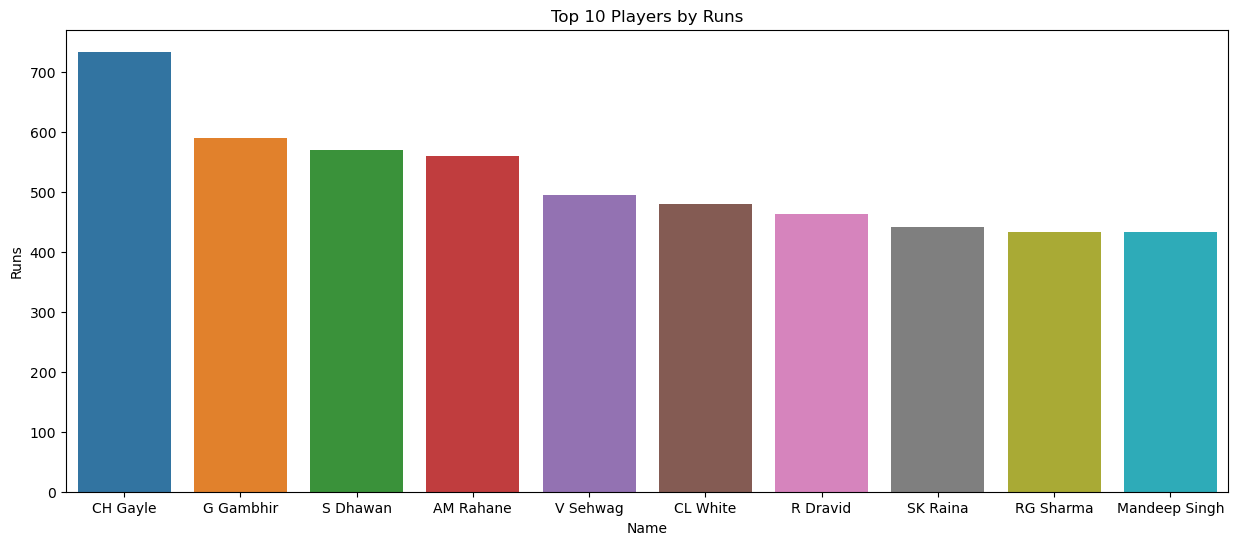

In [9]:
# Top 10 players by Runs
plt.figure(figsize = (15, 6))
runs = data.groupby('Name')['Runs'].sum().sort_values(ascending = False).head(10)
runs = runs.reset_index() 
runs.columns = ['Name', 'Runs']
sns.barplot(data = runs, x = 'Name', y ='Runs')
plt.title("Top 10 Players by Runs");

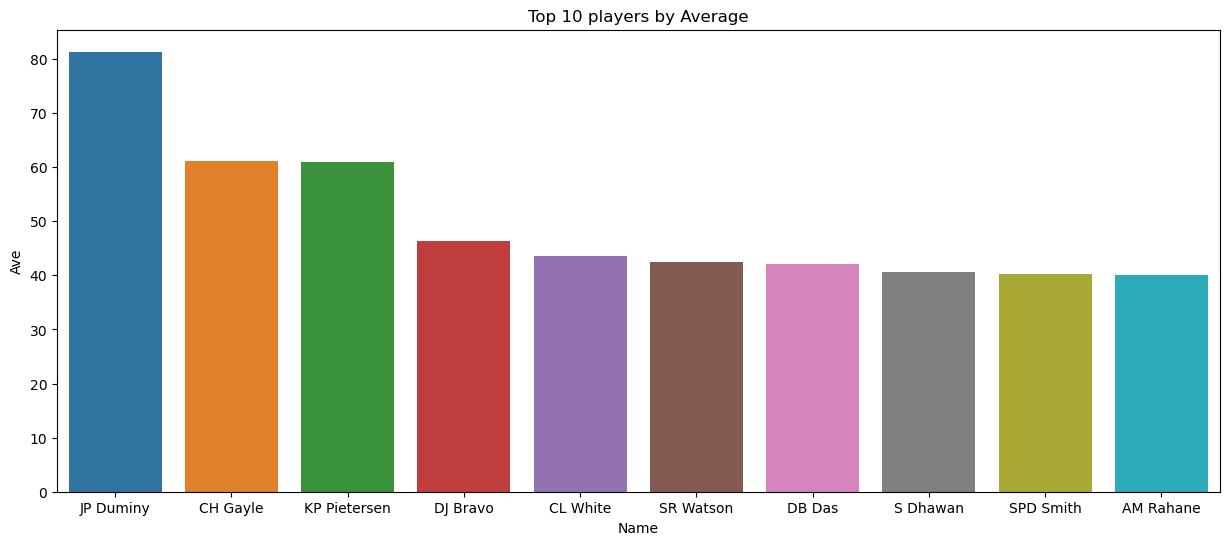

In [10]:
# Top 10 players by Average
plt.figure(figsize = (15,6))
avg = data.groupby('Name')['Ave'].sum().sort_values(ascending = False).head(10)
avg = avg.reset_index() 
avg.columns = ['Name' ,'Ave']
sns.barplot(data = avg, x = 'Name', y = 'Ave')
plt.title("Top 10 players by Average");

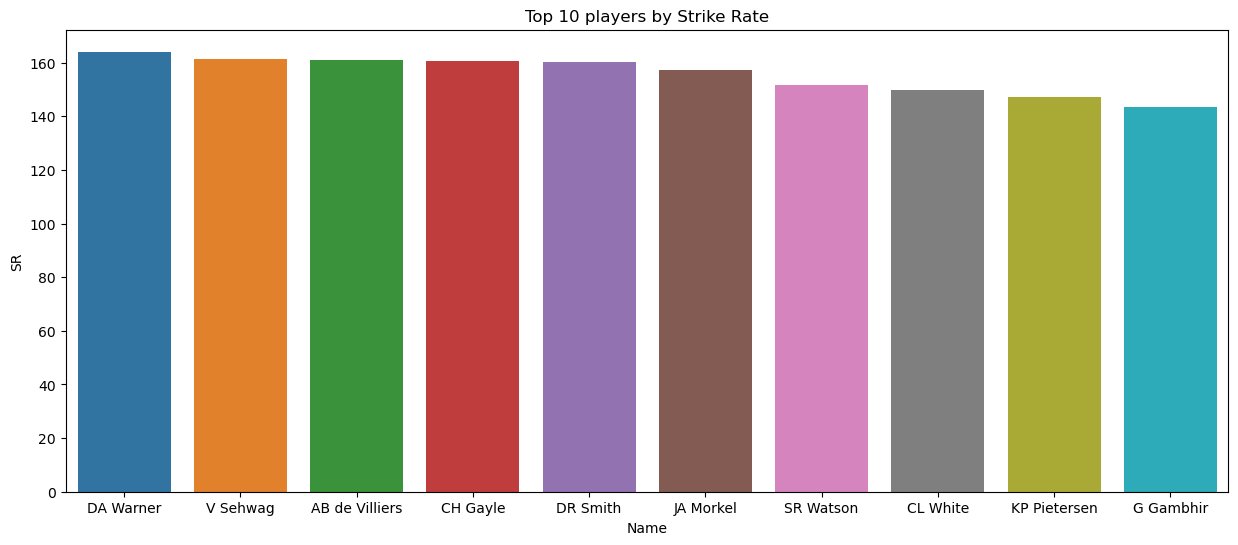

In [11]:
# Top 10 players by Strike Rate
plt.figure(figsize = (15, 6))
sr = data.groupby('Name')['SR'].sum().sort_values(ascending = False).head(10)
sr = sr.reset_index() 
sr.columns = ['Name', 'SR']
sns.barplot(data = sr, x = 'Name', y = 'SR')
plt.title("Top 10 players by Strike Rate");

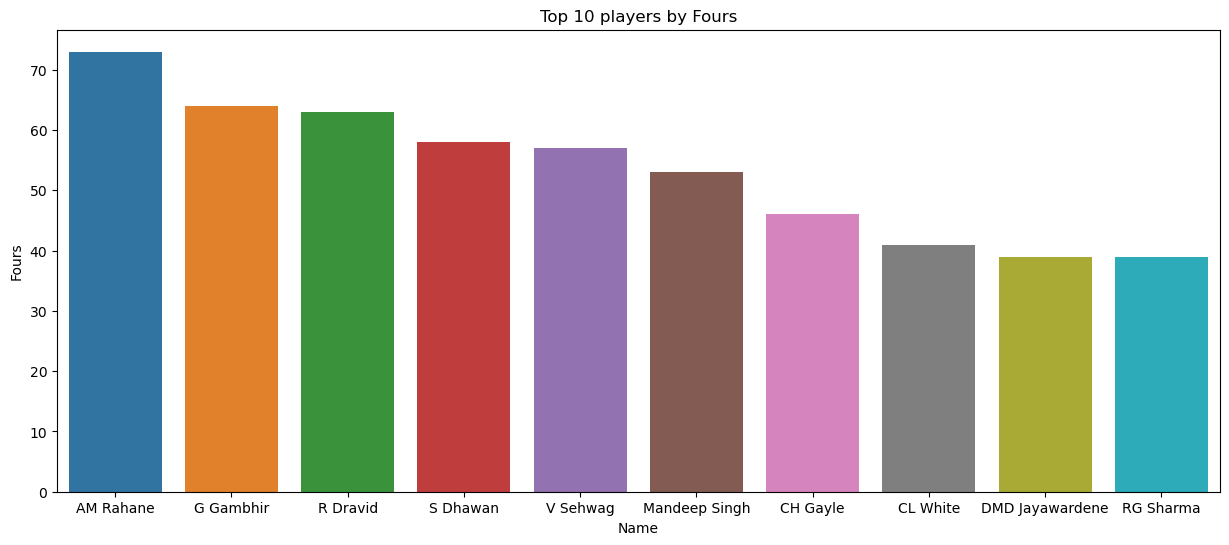

In [12]:
# Top 10 players by Fours
plt.figure(figsize = (15, 6))
fours = data.groupby('Name')['Fours'].sum().sort_values(ascending = False).head(10)
fours = fours.reset_index() 
fours.columns = ['Name', 'Fours']
sns.barplot(data = fours, x = 'Name', y = 'Fours')
plt.title("Top 10 players by Fours");

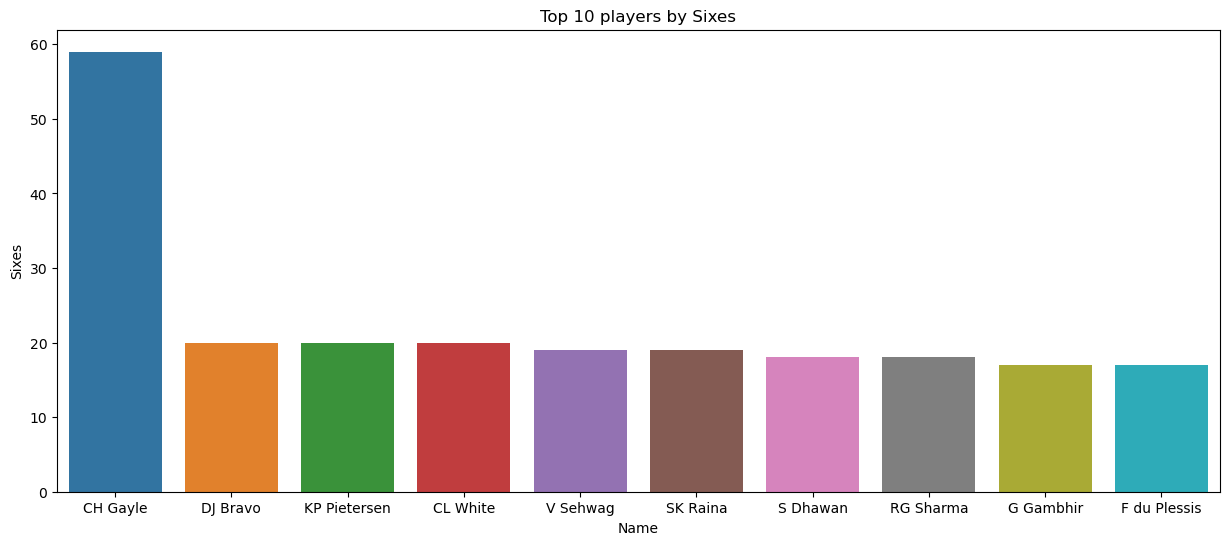

In [13]:
# Top 10 players by Sixes
plt.figure(figsize = (15, 6))
sixes = data.groupby('Name')['Sixes'].sum().sort_values(ascending = False).head(10)
sixes = sixes.reset_index() 
sixes.columns = ['Name', 'Sixes']
sns.barplot(data = sixes, x = 'Name', y = 'Sixes')
plt.title("Top 10 players by Sixes");

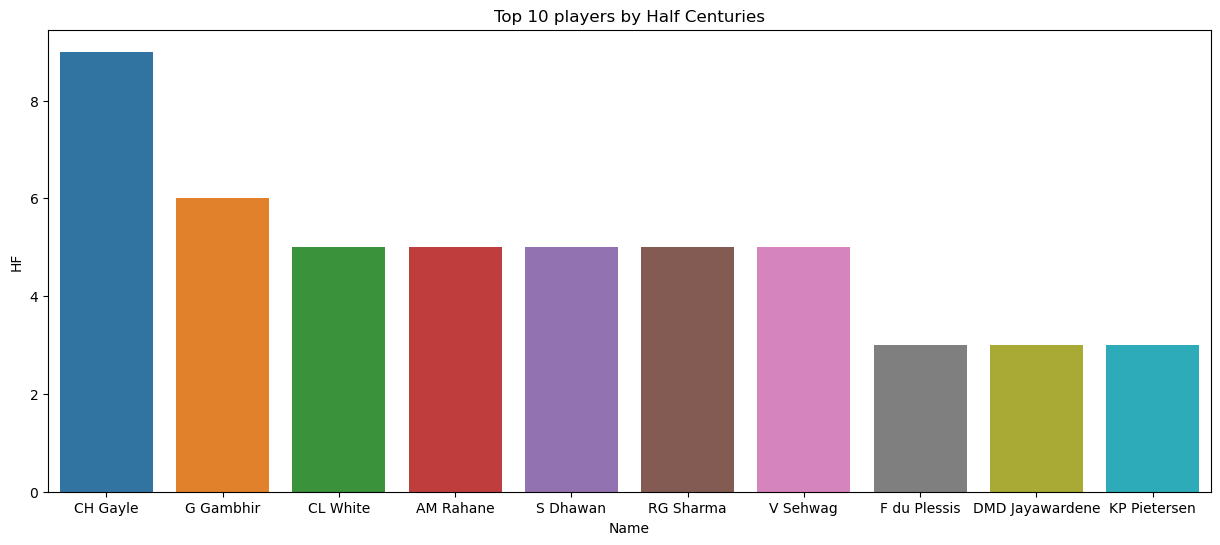

In [14]:
# Top 10 players by Half Centuries
plt.figure(figsize = (15, 6))
hf = data.groupby('Name')['HF'].sum().sort_values(ascending = False).head(10)
hf = hf.reset_index() 
hf.columns = ['Name','HF']
sns.barplot(data = hf, x = 'Name', y = 'HF')
plt.title("Top 10 players by Half Centuries");

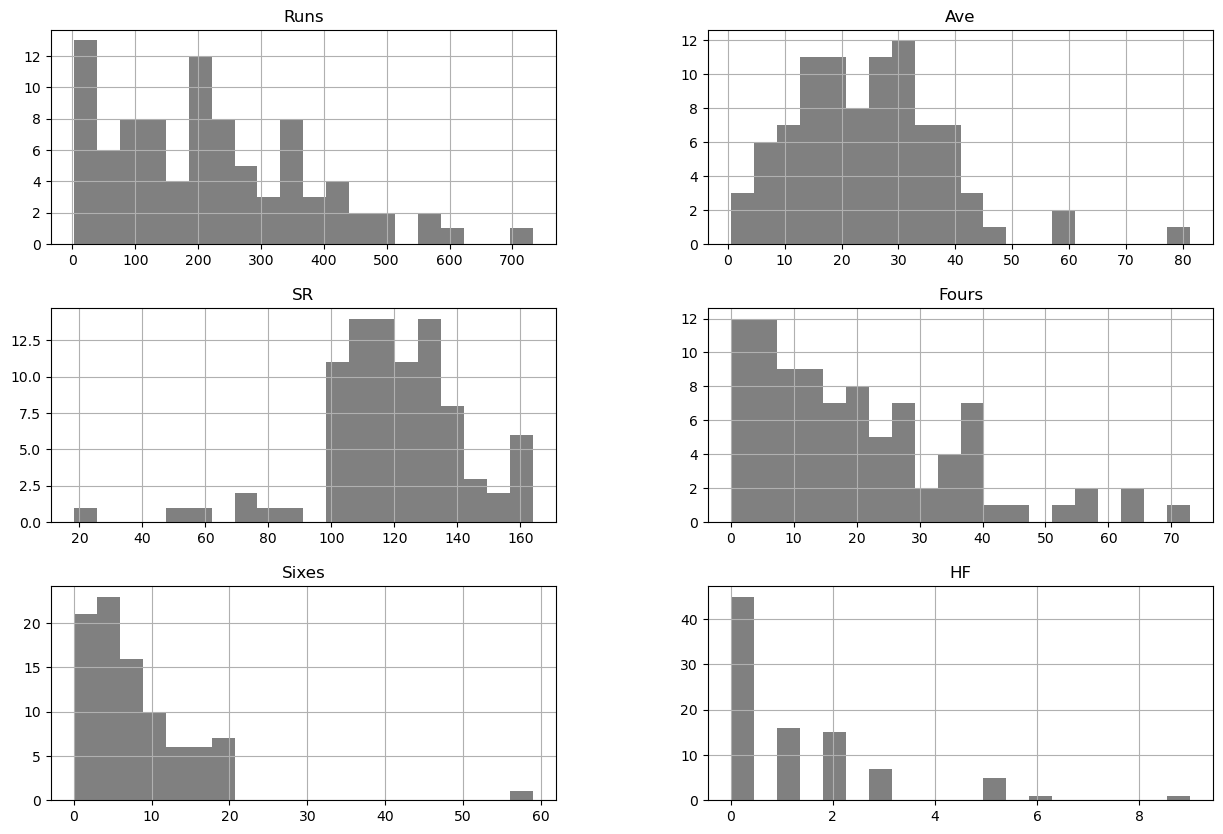

In [15]:
# Plot histograms of numerical features
data.hist(bins = 20, figsize = (15, 10), color = 'gray')
plt.show()

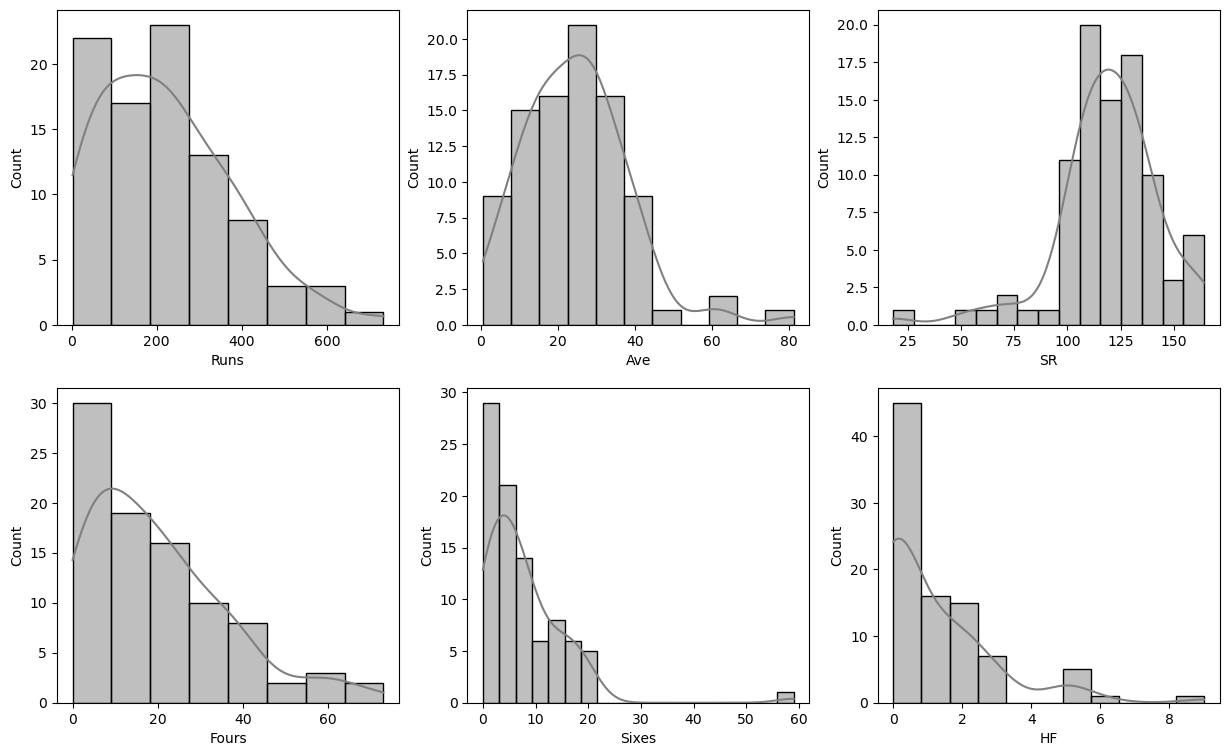

In [16]:
# Identify skewed distributions
plt.figure(figsize = (15, 9))
col = 1
for i in data.drop(columns = 'Name').columns:
    plt.subplot(2, 3, col)
    sns.histplot(data[i], color = 'gray', kde = True)
    col += 1 

- Runs, fours, sixes and hf are left skewed distribution.
- SR is right skewed

In [17]:
dd = data.drop(columns = 'Name')
dd.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,733.0,61.08,160.74,46.0,59.0,9.0
3,590.0,36.87,143.55,64.0,17.0,6.0
5,495.0,33.00,161.23,57.0,19.0,5.0
7,479.0,43.54,149.68,41.0,20.0,5.0
9,569.0,40.64,129.61,58.0,18.0,5.0


In [18]:
data

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


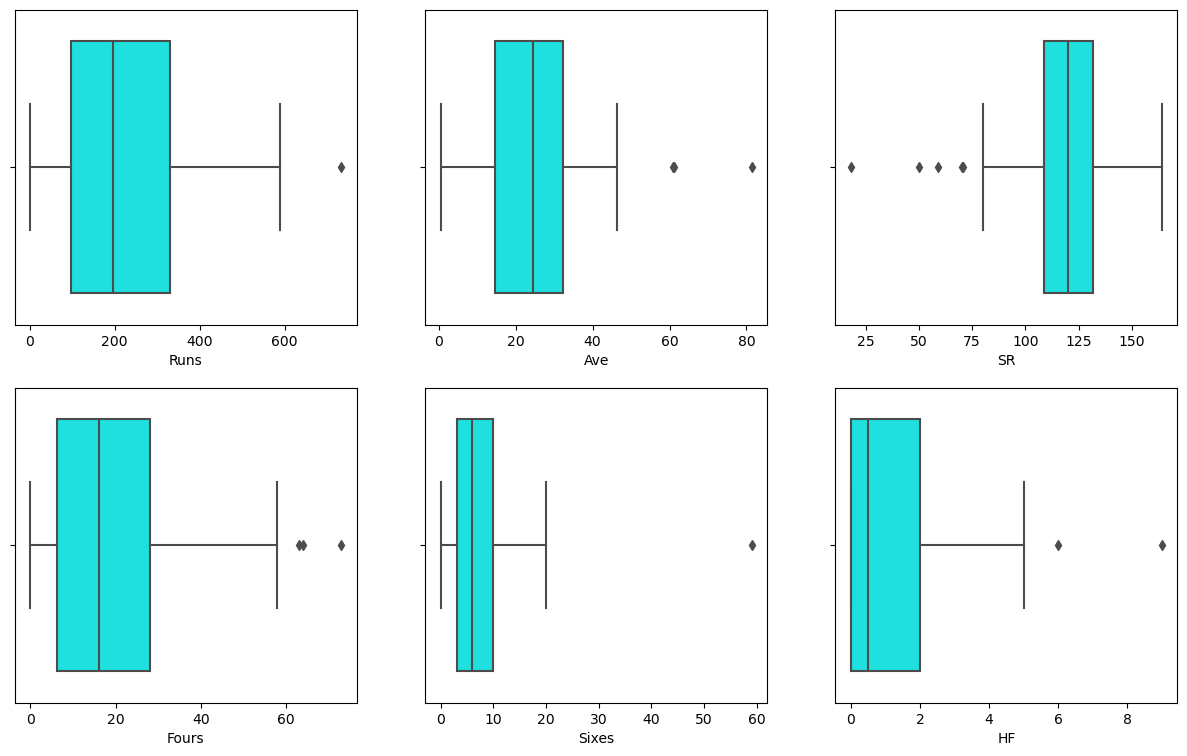

In [19]:
# Boxplots to identify outliers (not treating them)
plt.figure(figsize=(15, 9))
col = 1
for i in data.drop(columns = 'Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(x = data[i], color = 'cyan')
    col += 1

There appears to be outliers, and I will not be treating them as its highly likely that these are genuine observation and also because of the size of the dataset

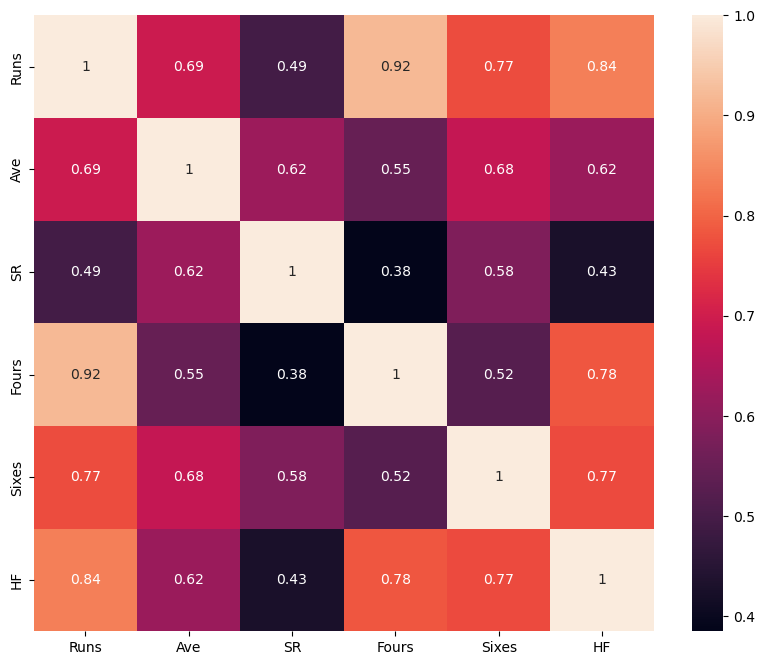

In [20]:
# Explore correlations between numerical features
plt.figure(figsize = (10, 8))
corr = data.drop(columns = 'Name').corr()

# Heatmap to visualize correlations
sns.heatmap(corr, annot = True);

All the variable except fours with strike rate, strike rate with half centuries,strike rate with runs, have high correlation

In [21]:
# Standardize numerical features
data_num = data.iloc[:,1:7] 
data_num = data_num.apply(zscore)
data_num.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [22]:
# Determine the optimal number of clusters using the Elbow Method
wss =[] 
for i in range(1,6):
    KM = KMeans(n_clusters=i, n_init = 'auto')
    KM.fit(data_num)
    wss.append(KM.inertia_)
wss

[540.0,
 296.2613535473202,
 223.36518460916955,
 178.17507967590407,
 154.2725086370097]

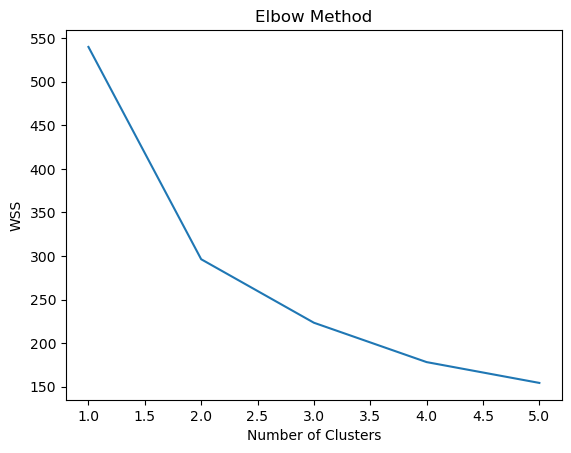

In [23]:
plt.plot(range(1, 6), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [24]:
# Apply K-Means clustering with the chosen number of clusters
k_means = KMeans(n_clusters = 2)
k_means.fit(data_num)
labels = k_means.labels_

In [25]:
# Calculate Silhouette Score for cluster quality evaluation
silhouette_score(data_num,labels)

0.41111085574076756

In [26]:
# Calculate Silhouette Score for cluster quality evaluation

kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}

silhouette_coefficients = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(data_num)
    score = silhouette_score(data_num, kmeans.labels_)
    silhouette_coefficients.append(score)

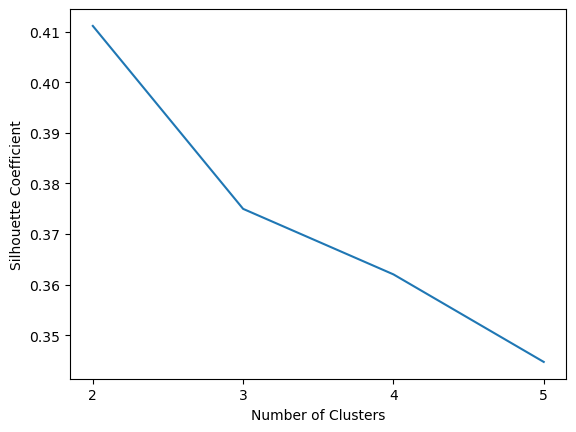

In [27]:
# Visualize Silhouette Coefficients for different cluster numbers
plt.plot(range(2, 6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [28]:
data['cluster'] = labels
data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [29]:
data.cluster.value_counts()

0    55
1    35
Name: cluster, dtype: int64

In [30]:
cluster = data.iloc[:, 0:9].groupby('cluster').mean()
cluster['Freq'] = data.cluster.value_counts().sort_index()
cluster

,Runs,Ave,SR,Fours,Sixes,HF,Freq
cluster,,,,,,,
0,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182,55
1,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286,35


In [31]:
# Analyze cluster statistics and assign cluster labels (e.g., Grade A, Grade B)
data['cluster'] = data['cluster'].replace({1 : 'Grade A', 0 : 'Grade B'})

In [32]:
# Separate data into Grade A and Grade B clusters
Grade_A = data[data['cluster'] == 'Grade A']
Grade_A.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade A


In [33]:
Grade_B = data[data['cluster'] == 'Grade B']
Grade_B.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Grade B
73,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Grade B
75,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Grade B
77,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Grade B
79,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Grade B
